<a href="https://colab.research.google.com/github/MisterGusMan/Deep_Learning_IGTI/blob/main/M%C3%B3dulo%201/Desafio_do_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential      
from keras.layers import Dense            
from keras.layers import Dropout          
from keras.utils import np_utils 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-08-17 14:56:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 142.251.45.16, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   221MB/s    in 0.3s    

2021-08-17 14:56:54 (221 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os, cv2, numpy as np 
from google.colab.patches import cv2_imshow
import zipfile 
from matplotlib import pyplot as plt #importa bilbioteca para criação de gráficos 
from sklearn.model_selection import train_test_split 
 
local_zip = '/tmp/cats_and_dogs_filtered.zip' 
 
 
 
 
zip_ref = zipfile.ZipFile(local_zip, 'r') 
zip_ref.extractall('/tmp') 
zip_ref.close() 
base_dir = '/tmp/cats_and_dogs_filtered' 
 
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
 
train_cats_dir = os.path.join(train_dir, 'cats')  # Diretório com imagens de treinamentos de gatos 
train_dogs_dir = os.path.join(train_dir, 'dogs')  # Diretório com imagens de treinamentos de cachorros 
validation_cats_dir = os.path.join(validation_dir, 'cats') # Diretório com imagens de teste de gatos 
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # Diretório com imagens de teste de cachorros

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [5]:
import glob
files = glob.glob(f'{train_dir}/**/*.jpg', recursive=True)
#É importante a ordenação para não perder a referência da imagem usada!
files.sort()
files_enum = list(enumerate(files))
images = np.empty ((len(files_enum)+1000,128,220,3), dtype=object)
labels = np.empty ((len(files_enum)+1000,), dtype=int)
# Experimenta inverter o shape
#images = np.empty ((len(files_enum),220,128,3), dtype=object)
print(images.shape,labels.shape)

(3000, 128, 220, 3) (3000,)


In [6]:
for n,f in files_enum:
    image = cv2.imread( f )
    if not image.shape[2] == 3:
      print(image.shape)
    image = cv2.resize(image, (220, 128))
    #image = cv2.resize(image, (128, 220))
    images[n] = image
    filename=f.split("/")[-1]
    if 'dog' in  filename:
      labels[n] = 0
    elif 'cat' in  filename:
      labels[n] = 1
    else:
      print("Opa! Inesperado! Nem gato nem cachorro! ")

In [7]:
from keras.preprocessing.image import ImageDataGenerator # Importa biblioteca de data augmentation

aug = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2, rotation_range=45)

#imageGen = aug.flow(images[1:100], labels[1:100], batch_size = 1)
imageGen = aug.flow(images, labels, batch_size = 1)
#imageGen = aug.flow(images, batch_size = 1)

# Imprime imagens geradas
for i in range(1000+1):
  next = imageGen.next()
  #print(next.shape)
  #print(next[1])
  #imgPrint = np.array(next)
  imgPrint, l = next
  #print(imgPrint.shape)
  #cv2_imshow(imgPrint[0,:,:,:])
  images[1999+i] = imgPrint
  labels[1999+i] = l

In [8]:
print(images.shape,labels.shape)
labels[2999]

(3000, 128, 220, 3) (3000,)


1

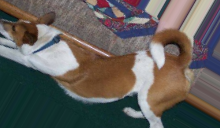

In [9]:
cv2_imshow(images[2111,:,:,:])

In [15]:
files_enum[:10]

[(0, '/tmp/cats_and_dogs_filtered/train/cats/cat.0.jpg'),
 (1, '/tmp/cats_and_dogs_filtered/train/cats/cat.1.jpg'),
 (2, '/tmp/cats_and_dogs_filtered/train/cats/cat.10.jpg'),
 (3, '/tmp/cats_and_dogs_filtered/train/cats/cat.100.jpg'),
 (4, '/tmp/cats_and_dogs_filtered/train/cats/cat.101.jpg'),
 (5, '/tmp/cats_and_dogs_filtered/train/cats/cat.102.jpg'),
 (6, '/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg'),
 (7, '/tmp/cats_and_dogs_filtered/train/cats/cat.104.jpg'),
 (8, '/tmp/cats_and_dogs_filtered/train/cats/cat.105.jpg'),
 (9, '/tmp/cats_and_dogs_filtered/train/cats/cat.106.jpg')]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

In [20]:
print(X_train.shape, y_train.shape)

(2100, 128, 220, 3) (2100,)


In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import ResNet152

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


model = VGG16(include_top = True, weights=None, classes=2, input_shape=(220,128,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 220, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 220, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 220, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 110, 64, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 110, 64, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 110, 64, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 55, 32, 128)       0     

In [13]:
model2 = VGG19(include_top = True, weights=None, classes=2, input_shape=(220,128,3))
model2.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 220, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 220, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 220, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 110, 64, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 110, 64, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 110, 64, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 55, 32, 128)       0     

In [14]:
model3 = ResNet152(include_top = True, weights=None, classes=2, input_shape=(220,128,3))
model3.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 220, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 226, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 110, 64, 64)  9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 110, 64, 64)  256         conv1_conv[0][0]                 
__________________________________________________________________________________________